In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import seaborn as sns

Using TensorFlow backend.


In [63]:
(xtr,ytr),(xts,yts) = mnist.load_data()

In [64]:
y_true = yts

In [4]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')

xtr shape:(60000, 28, 28)
ytr shape:(60000,)


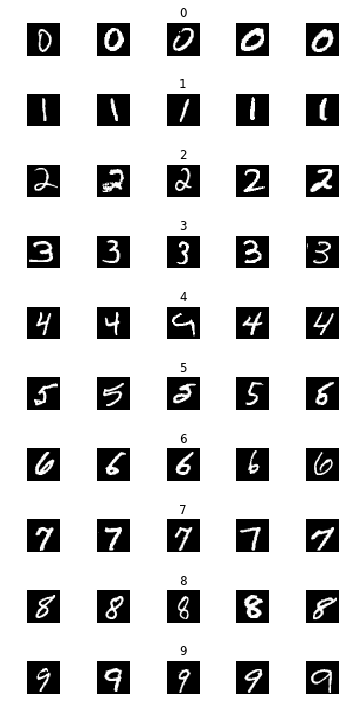

In [5]:
n_cols = 5
n_classes = 10

fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()
for i in range(n_cols):
    for j in range(n_classes):
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i ==2:
            axes[j][i].set_title(str(j))

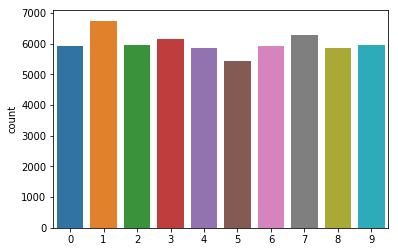

In [6]:
sns.countplot(ytr)
plt.show()

# Pre-processing

In [65]:
n_pixels = xtr.shape[1]*xtr.shape[2]
xtr = xtr.reshape(xtr.shape[0],n_pixels)
xtr = xtr/255

In [66]:
xts = xts.reshape(xts.shape[0],n_pixels)
xts = xts/255

# OneHotEncoding ytr array

In [67]:
from keras.utils.np_utils import to_categorical
ytr = to_categorical(ytr,10) #10 represents number of classes/categories
yts = to_categorical(yts,10)

In [68]:
ytr.shape[1]

10

# creating Nural Net model

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [12]:
def create_model():
    model = Sequential()
    model.add(Dense(32,input_dim=n_pixels,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
h = model.fit(xtr,ytr,epochs=10,validation_data=(xts,yts),verbose=1,
             batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1247 - accuracy: 0.9660 - val_loss: 0.1690 - val_accuracy: 0.9582
Epoch 2/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.1255 - accuracy: 0.9651 - val_loss: 0.2081 - val_accuracy: 0.9536
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1254 - accuracy: 0.9654 - val_loss: 0.1911 - val_accuracy: 0.9554
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1230 - accuracy: 0.9661 - val_loss: 0.2445 - val_accuracy: 0.9476
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.1240 - accuracy: 0.9662 - val_loss: 0.2030 - val_accuracy: 0.9556
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1240 - accuracy: 0.9665 - val_loss: 0.2168 - val_accuracy: 0.9543
Epoch 7/10
60000/60000 [==============================] - 3s 48us/st

# Predicting images

In [54]:
import cv2

In [55]:
img = cv2.imread(r"C:\Users\shamaun\Desktop\Datasets\digit2.png")

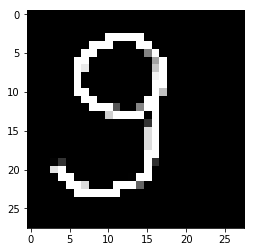

In [56]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [57]:
img = img.reshape(1,n_pixels)
img = img/255

In [58]:
model.predict_classes(img)

array([3], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix

In [69]:
y_pred = model.predict_classes(xts)

In [70]:
print(confusion_matrix(y_true,y_pred))

[[ 950    0    1    0    0    7    5   12    3    2]
 [   0 1123    4    1    0    2    1    0    4    0]
 [   4    3  986    7    7    8    0    2   15    0]
 [   0    2   14  902    0   62    0    7   13   10]
 [   1    1    3    0  905    8    9    3    3   49]
 [   3    3    2    5    1  843   12    3   10   10]
 [   2    2    3    0    9   15  920    0    7    0]
 [   0    9   14    4    0    2    0  980    3   16]
 [   5    1    6    2    7   16   11    3  909   14]
 [   4    7    0    4    9   12    0   11    6  956]]
